In [7]:
#Q1
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer  # noqa: F401
from sklearn.impute import IterativeImputer


titanic = sns.load_dataset("titanic")


cols = ["age", "fare", "pclass", "parch", "sibsp"]
df = titanic[cols].copy()
print("Original missing counts:\n", df.isna().sum())


df_drop = df.dropna()
print("\nAfter dropna - shape:", df_drop.shape, "missing:\n", df_drop.isna().sum())


df_mean = df.copy()
df_median = df.copy()
df_mean["age"] = df_mean["age"].fillna(df_mean["age"].mean())
df_median["age"] = df_median["age"].fillna(df_median["age"].median())

df_mean["fare"] = df_mean["fare"].fillna(df_mean["fare"].mean())
df_median["fare"] = df_median["fare"].fillna(df_median["fare"].median())

print("\nMean imputed missing counts:\n", df_mean.isna().sum())
print("Median imputed missing counts:\n", df_median.isna().sum())


df_num = df.copy()
knn = KNNImputer(n_neighbors=5)
iter_imp = IterativeImputer(random_state=42)

df_knn = pd.DataFrame(knn.fit_transform(df_num), columns=df_num.columns, index=df_num.index)
df_iter = pd.DataFrame(iter_imp.fit_transform(df_num), columns=df_num.columns, index=df_num.index)

print("\nKNN imputed missing counts:\n", df_knn.isna().sum())
print("Iterative imputed missing counts:\n", df_iter.isna().sum())


def stats(name, s):
    return f"{name}: mean={s.mean():.2f}, median={s.median():.2f}, std={s.std():.2f}"

print("\nAge stats comparison:")
print(stats("Original (drop missing)", df_drop["age"]))
print(stats("Mean", df_mean["age"]))
print(stats("Median", df_median["age"]))
print(stats("KNN", df_knn["age"]))
print(stats("Iterative", df_iter["age"]))

Original missing counts:
 age       177
fare        0
pclass      0
parch       0
sibsp       0
dtype: int64

After dropna - shape: (714, 5) missing:
 age       0
fare      0
pclass    0
parch     0
sibsp     0
dtype: int64

Mean imputed missing counts:
 age       0
fare      0
pclass    0
parch     0
sibsp     0
dtype: int64
Median imputed missing counts:
 age       0
fare      0
pclass    0
parch     0
sibsp     0
dtype: int64

KNN imputed missing counts:
 age       0
fare      0
pclass    0
parch     0
sibsp     0
dtype: int64
Iterative imputed missing counts:
 age       0
fare      0
pclass    0
parch     0
sibsp     0
dtype: int64

Age stats comparison:
Original (drop missing): mean=29.70, median=28.00, std=14.53
Mean: mean=29.70, median=29.70, std=13.00
Median: mean=29.36, median=28.00, std=13.02
KNN: mean=29.86, median=29.00, std=13.39
Iterative: mean=29.29, median=27.63, std=13.61


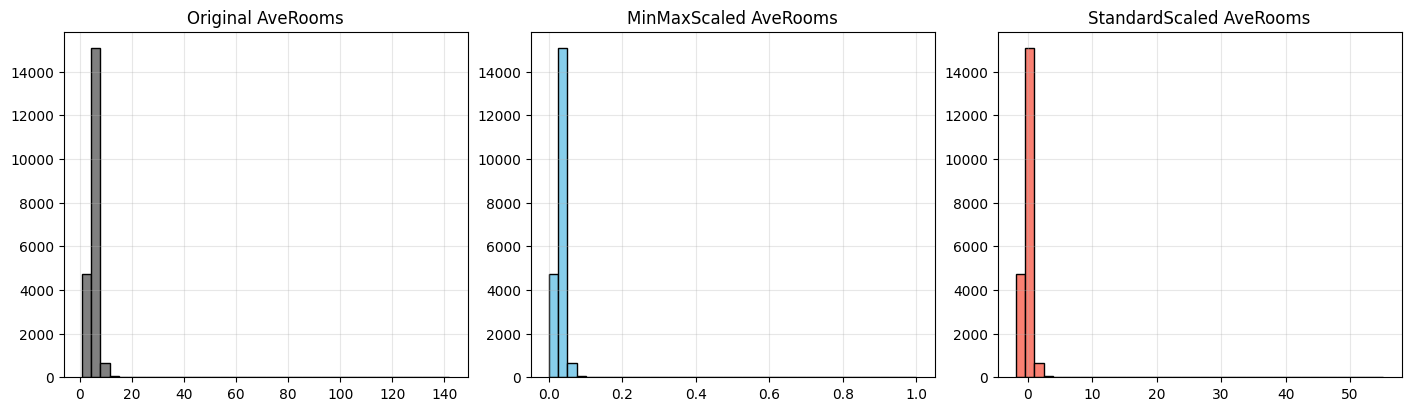

Note: StandardScaler is generally more appropriate when features have outliers,
because MinMaxScaler is highly sensitive to extreme values and can squash the bulk of the data.


In [8]:
#Q2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data = fetch_california_housing(as_frame=True)
X = data.frame.drop(columns=["MedHouseVal"])
feature = "AveRooms"

mm = MinMaxScaler()
ss = StandardScaler()

X_mm = pd.DataFrame(mm.fit_transform(X), columns=X.columns)
X_ss = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

fig, axes = plt.subplots(1, 3, figsize=(14, 4), constrained_layout=True)
axes[0].hist(X[feature], bins=40, color="gray", edgecolor="black")
axes[0].set_title(f"Original {feature}")

axes[1].hist(X_mm[feature], bins=40, color="skyblue", edgecolor="black")
axes[1].set_title(f"MinMaxScaled {feature}")

axes[2].hist(X_ss[feature], bins=40, color="salmon", edgecolor="black")
axes[2].set_title(f"StandardScaled {feature}")

for ax in axes:
    ax.grid(alpha=0.3)

plt.show()

print("Note: StandardScaler is generally more appropriate when features have outliers,")
print("because MinMaxScaler is highly sensitive to extreme values and can squash the bulk of the data.")

In [9]:
#Q3

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

titanic = sns.load_dataset("titanic")
cat = titanic["embarked"].dropna().astype(str)  # C, Q, S


le = LabelEncoder()
labels = le.fit_transform(cat)


ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
onehot = ohe.fit_transform(cat.to_frame())

print("Original categories (first 5):", cat.head().tolist())
print("Label Encoded (first 5):", labels[:5].tolist())
print("One-Hot Encoded shape:", onehot.shape, "categories:", ohe.categories_)

print("\nGuidance:")
print("- Use LabelEncoder when the model can naturally handle categorical codes or when there is a true ordinal relationship.")
print("- Use OneHotEncoder for nominal categories with no order (most tree/linear models), avoiding implicit ordinality.")

Original categories (first 5): ['S', 'C', 'S', 'S', 'S']
Label Encoded (first 5): [2, 0, 2, 2, 2]
One-Hot Encoded shape: (889, 3) categories: [array(['C', 'Q', 'S'], dtype=object)]

Guidance:
- Use LabelEncoder when the model can naturally handle categorical codes or when there is a true ordinal relationship.
- Use OneHotEncoder for nominal categories with no order (most tree/linear models), avoiding implicit ordinality.


In [10]:
#Q4

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

def minmax_normalize(x):
    x = np.asarray(x, dtype=float)
    x_min, x_max = np.nanmin(x), np.nanmax(x)
    if x_max == x_min:
        return np.zeros_like(x)
    return (x - x_min) / (x_max - x_min)

iris = load_iris(as_frame=True)
X = iris.data.copy()
col = "sepal length (cm)"

manual = minmax_normalize(X[col].values)
scaler = MinMaxScaler()
sk_scaled = scaler.fit_transform(X[[col]]).ravel()

print("First 5 - Manual:", np.round(manual[:5], 4))
print("First 5 - Sklearn:", np.round(sk_scaled[:5], 4))
print("Max abs diff:", np.max(np.abs(manual - sk_scaled)))

First 5 - Manual: [0.2222 0.1667 0.1111 0.0833 0.1944]
First 5 - Sklearn: [0.2222 0.1667 0.1111 0.0833 0.1944]
Max abs diff: 2.220446049250313e-16


In [11]:
#Q5

import pandas as pd
import seaborn as sns

titanic = sns.load_dataset("titanic")
df = titanic[["age", "class", "sex", "fare"]].copy()

print("Missing before:\n", df.isna().sum())

group_medians = df.groupby(["class", "sex"])["age"].transform("median")

df["age_imputed"] = df["age"].fillna(group_medians)

print("\nMissing after (age_imputed):\n", df[["age", "age_imputed"]].isna().sum())
print("\nSample rows:\n", df.head(10))

Missing before:
 age      177
class      0
sex        0
fare       0
dtype: int64

Missing after (age_imputed):
 age            177
age_imputed      0
dtype: int64

Sample rows:
     age   class     sex     fare  age_imputed
0  22.0   Third    male   7.2500         22.0
1  38.0   First  female  71.2833         38.0
2  26.0   Third  female   7.9250         26.0
3  35.0   First  female  53.1000         35.0
4  35.0   Third    male   8.0500         35.0
5   NaN   Third    male   8.4583         25.0
6  54.0   First    male  51.8625         54.0
7   2.0   Third    male  21.0750          2.0
8  27.0   Third  female  11.1333         27.0
9  14.0  Second  female  30.0708         14.0


/tmp/ipython-input-3427648062.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_medians = df.groupby(["class", "sex"])["age"].transform("median")


In [12]:
#Q6

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
y = data.frame["MedHouseVal"].to_frame(name="value")


z = (y["value"] - y["value"].mean()) / y["value"].std()
z_outliers = y[np.abs(z) > 3]  # threshold 3


Q1, Q3 = y["value"].quantile(0.25), y["value"].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
iqr_outliers = y[(y["value"] < lower) | (y["value"] > upper)]

print("Z-score outliers:", z_outliers.shape[0])
print("IQR outliers:", iqr_outliers.shape[0])
print("Z-score thresholds: |z|>3")
print(f"IQR thresholds: lower={lower:.3f}, upper={upper:.3f}")

Z-score outliers: 0
IQR outliers: 1071
Z-score thresholds: |z|>3
IQR thresholds: lower=-0.981, upper=4.824


In [13]:
#Q7

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

titanic = sns.load_dataset("titanic")
df = titanic[["sibsp", "parch", "survived"]].copy()

df["FamilySize"] = df["sibsp"].fillna(0) + df["parch"].fillna(0) + 1

mm = MinMaxScaler()
ss = StandardScaler()

df["FamilySize_norm"] = mm.fit_transform(df[["FamilySize"]])
df["FamilySize_std"] = ss.fit_transform(df[["FamilySize"]])

print(df[["sibsp", "parch", "FamilySize", "FamilySize_norm", "FamilySize_std"]].head(10))

   sibsp  parch  FamilySize  FamilySize_norm  FamilySize_std
0      1      0           2              0.1        0.059160
1      1      0           2              0.1        0.059160
2      0      0           1              0.0       -0.560975
3      1      0           2              0.1        0.059160
4      0      0           1              0.0       -0.560975
5      0      0           1              0.0       -0.560975
6      0      0           1              0.0       -0.560975
7      3      1           5              0.4        1.919564
8      0      2           3              0.2        0.679295
9      1      0           2              0.1        0.059160
